In [2]:
source('../../../../source/basic.r')

In [6]:
source('../../../validataion.r')

# read data

In [8]:
datafr.all<- qread('../../datafr/combinedPeaks.datafr.qs')

In [10]:
metadata <- read.table('../../raw_data/input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

# run functions

## all features

In [11]:
psize(10,10)

In [12]:
res.all=fun_all(datafr.all,plot.hist = FALSE)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"
1.45014716386795



## top 5K HVFs

In [13]:
df <- res.all$tf_idf_counts%>%as.matrix%>%as.data.frame

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"


In [14]:
rownames(df) <- res.all$ncounts.nosex %>% rownames

In [15]:
df.vars=df%>%.[rowSums(.)>0,]%>%apply(1,var)
df.means=df%>%.[rowSums(.)>0,]%>%apply(1,mean)

df.plot <- df.vars%>%cbind(df.means)%>%as.data.frame%>%rename_with(~c('var','mean'))

In [16]:
psize()

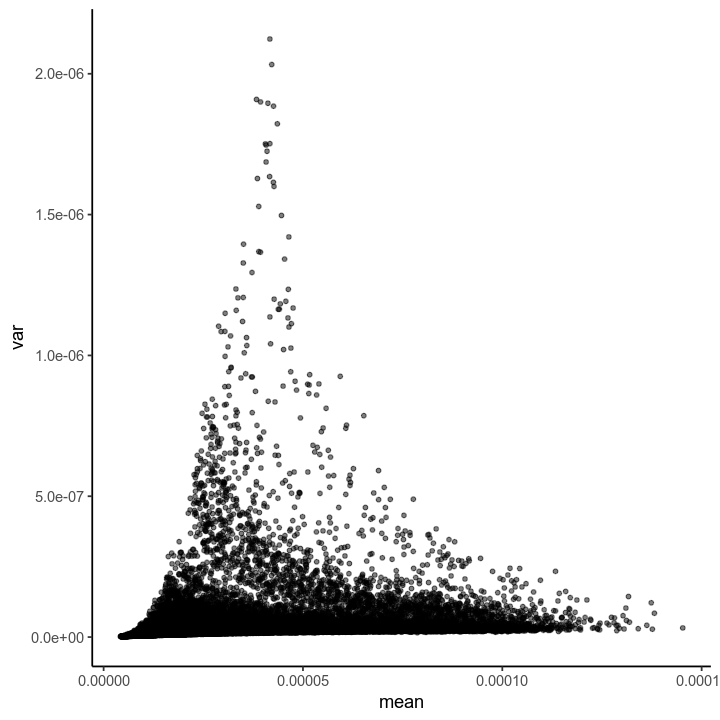

In [17]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [18]:
df.plot <- df.plot%>%mutate(rank.var=base::rank(plyr::desc(var)),
                            rank.mean=base::rank(plyr::desc(mean)),
                            labels=ifelse(rank.var<5000,ifelse(mean>0.2e-4,'variable','non-variable'),'non-variable'))

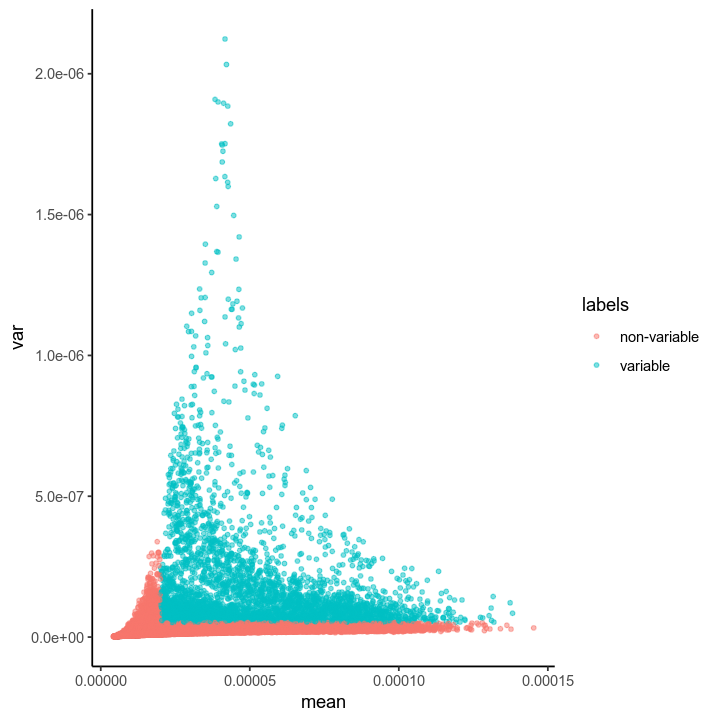

In [19]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(aes(color=labels),cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [20]:
select.peaks <- df.plot%>%filter(labels=='variable')%>%rownames

In [21]:
res.top=fun_all(datafr.all[select.peaks,],plot.hist = FALSE)

7.18693995475769



## top 50K HVFs

In [22]:
df <- res.all$tf_idf_counts%>%as.matrix%>%as.data.frame

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 1.5 GiB"


In [23]:
rownames(df) <- res.all$ncounts.nosex %>% rownames

In [24]:
df.vars=df%>%.[rowSums(.)>0,]%>%apply(1,var)
df.means=df%>%.[rowSums(.)>0,]%>%apply(1,mean)

df.plot <- df.vars%>%cbind(df.means)%>%as.data.frame%>%rename_with(~c('var','mean'))

In [25]:
psize()

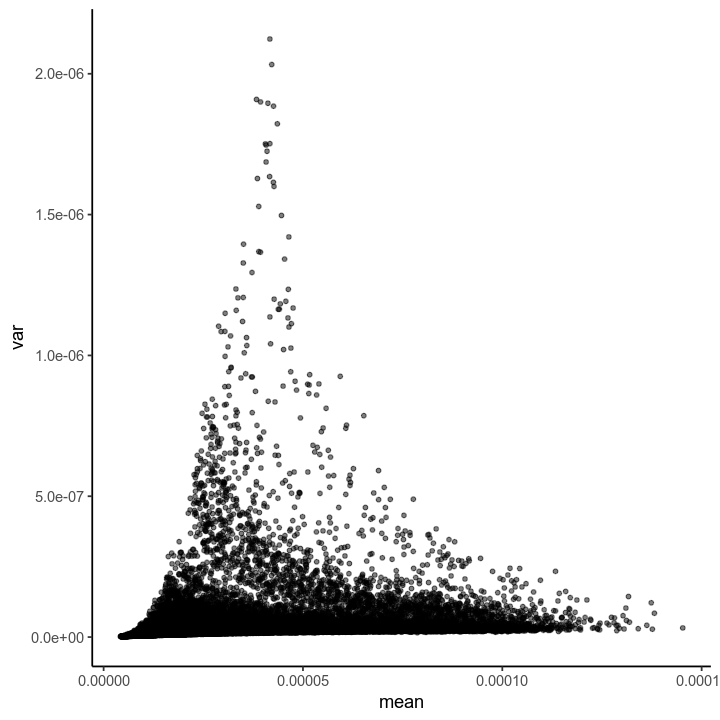

In [26]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [28]:
df.plot <- df.plot%>%mutate(rank.var=base::rank(plyr::desc(var)),
                            rank.mean=base::rank(plyr::desc(mean)),
                            labels=ifelse(rank.var<50000,ifelse(mean>0.1e-4,'variable','non-variable'),'non-variable'))

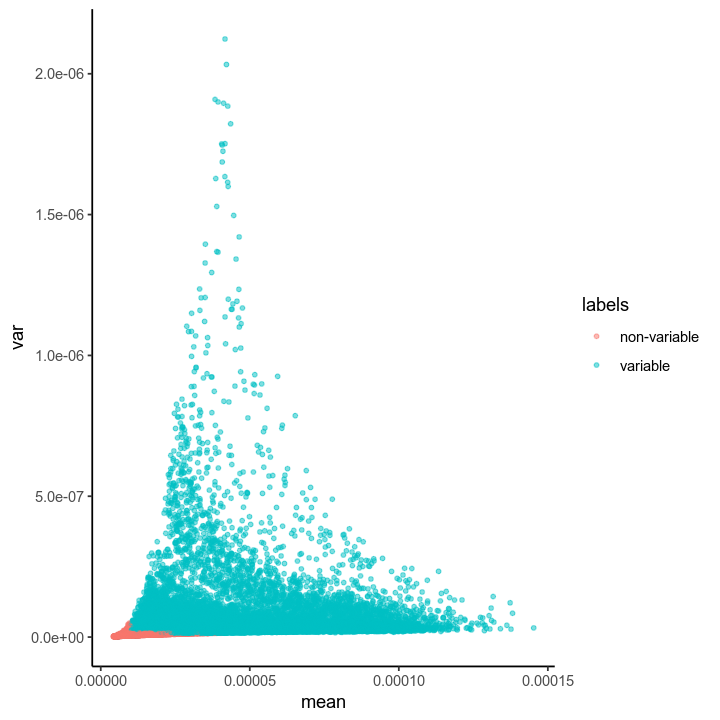

In [29]:
df.plot%>%ggplot(aes(x=mean,y=var))+geom_point(aes(color=labels),cex=1,alpha=0.5)+theme_classic()#+xlim(c(0,20))+ylim(c(0,400))

In [30]:
select.peaks <- df.plot%>%filter(labels=='variable')%>%rownames

In [31]:
## save region selection as qs
select.peaks%>%qsave('../../cpeaks_filteredFeature/combinedPeaks.top2.regions.qs')

In [32]:
# select.peaks<- qread('./cpeaks_filteredFeature/combinedPeaks.top.regions.qs')

a=select.peaks%>%lapply(str_split,pattern = '_')%>%as.data.frame%>%t%>%as.data.frame
rownames(a) <- NULL
a$V2 <- as.numeric(a$V2)
a$V3 <- as.numeric(a$V3)

## save region selection as bed
a%>%write_tsv('../../cpeaks_filteredFeature/combinedPeaks.top2.regions.bed',col_names = FALSE)

In [33]:
res.top2=fun_all(datafr.all[select.peaks,],plot.hist = FALSE)

44.3024423122406



# plots

In [41]:
psize(12,2.2)

In [42]:
plot.list <- c()

In [ ]:
plot.list[['all']]=fun_densityClust(res = res.all,labels=metadata[,'label'],title='all')
plot.list[['top']]=fun_densityClust(res = res.top,labels=metadata[,'label'],title='top',
                   rho_=5,delta_=5)
plot.list[['top2']]=fun_densityClust(res = res.top2,labels=metadata[,'label'],title='top',
                   rho_=5,delta_=5)

In [ ]:
pdf('./plots/combinedPeaks.pdf',width = 12,height = 2)
plot.list%>%lapply(function(x){grid.arrange(x$plot$plot.clusterNum,
                            x$plot$plot.tsne.cluster,
                            x$plot$plot.umap.cluster,
                           x$plot$plot.tsne.label+theme(legend.position = 'none'),
                           x$plot$plot.umap.label+theme(legend.position = 'none'),ncol=5)})
dev.off()

# save results to RDS

In [46]:
rds.list <- list(
    res.all=res.all,
    res.top=res.top,
    res.top2=res.top2
                )

In [ ]:
rds.list%>%names%>%lapply(function(x){
    
    saveRDS(rds.list[[x]]$df_out,file = paste0('./rds/FM_combinedPeaks-',gsub('\\.','-',x),'_data1.rds'))
    
})